In [1]:
import pandas as pd
impact_ = pd.read_csv("/content/sample_data/csvfiles/impact_of_remote_work_mental_health.csv")
impact_.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Text(0.5, 1.1, 'Percentage of Stress Levels by Mental Health Conditions')

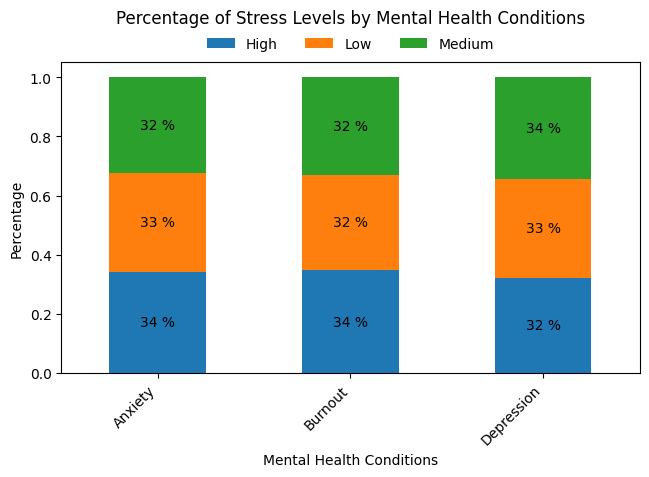

In [79]:
x_var, y_var = "Mental_Health_Condition", "Stress_Level"
imp_stacked = impact_.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
imp_stacked.plot.bar(stacked=True)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in imp_stacked.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
plt.tight_layout()
plt.xlabel("Mental Health Conditions")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage")
plt.title("Percentage of Stress Levels by Mental Health Conditions", y=1.10)

Text(0.5, 1.1, 'Hours Worked Per Week by Mental Health Conditions')

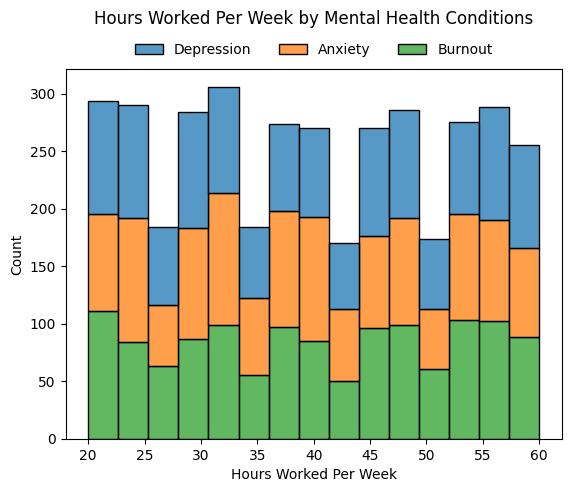

In [96]:
impact_hist = sns.histplot(data=impact_, x="Hours_Worked_Per_Week", hue="Mental_Health_Condition", multiple="stack")
sns.move_legend(
    impact_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
impact_hist.set_xlabel("Hours Worked Per Week")
impact_hist.set_ylabel("Count")
impact_hist.set_title("Hours Worked Per Week by Mental Health Conditions", y=1.10)

In [37]:
dep_imp = impact_.loc[impact_['Mental_Health_Condition'] == 'Depression']
dep_imp.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe


Text(0.5, 1.1, 'Stress Level and Hours of Workers with Depression')

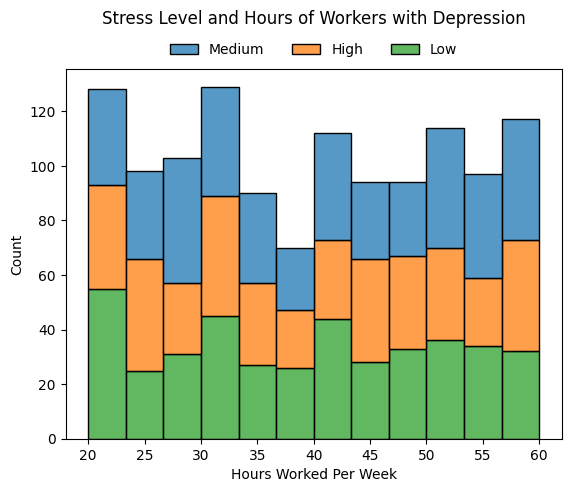

In [97]:
dep_hist = sns.histplot(data=dep_imp, x="Hours_Worked_Per_Week",hue="Stress_Level", multiple="stack")
sns.move_legend(
    dep_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
dep_hist.set_xlabel("Hours Worked Per Week")
dep_hist.set_ylabel("Count")
dep_hist.set_title("Stress Level and Hours of Workers with Depression", y=1.10)

In [42]:
anx_imp = impact_.loc[impact_['Mental_Health_Condition'] == 'Anxiety']
anx_imp.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,Low,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America
14,EMP0015,36,Prefer not to say,Project Manager,Retail,23,Remote,59,11,3,High,Anxiety,Yes,Decrease,5,Neutral,3,Weekly,Average,Oceania


Text(0.5, 1.1, 'Stress Level and Hours of Workers with Anxiety')

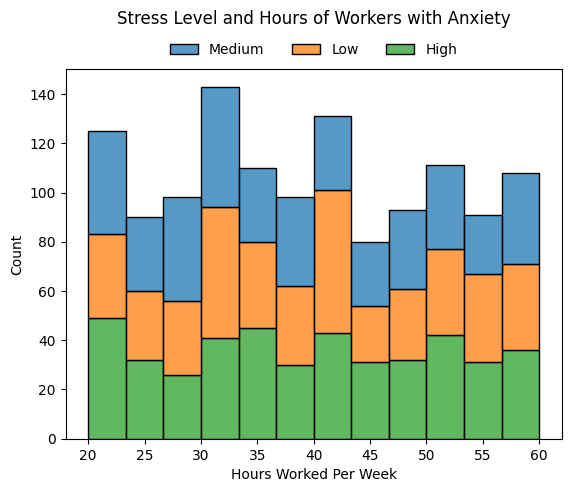

In [98]:
anx_hist = sns.histplot(data=anx_imp, x="Hours_Worked_Per_Week",hue="Stress_Level", multiple="stack")
sns.move_legend(
    anx_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
anx_hist.set_xlabel("Hours Worked Per Week")
anx_hist.set_ylabel("Count")
anx_hist.set_title("Stress Level and Hours of Workers with Anxiety",y=1.10)

In [45]:
burn_imp = impact_.loc[impact_['Mental_Health_Condition'] == 'Burnout']
burn_imp.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
17,EMP0018,45,Non-binary,Data Scientist,Consulting,20,Onsite,37,8,3,Low,Burnout,Yes,Decrease,5,Neutral,5,Weekly,Good,Europe
20,EMP0021,26,Female,Sales,Retail,33,Hybrid,21,1,2,Low,Burnout,No,Increase,2,Satisfied,1,Weekly,Poor,South America
24,EMP0025,56,Male,Sales,Finance,6,Remote,54,15,3,Low,Burnout,No,Increase,2,Neutral,4,Daily,Average,North America
25,EMP0026,49,Male,Project Manager,Healthcare,23,Onsite,21,14,4,High,Burnout,No,No Change,4,Neutral,3,NaN,Good,South America
40,EMP0041,30,Non-binary,Data Scientist,IT,22,Remote,44,15,4,High,Burnout,No,Decrease,1,Neutral,5,Daily,Poor,Europe


Text(0.5, 1.1, 'Stress Level and Hours of Workers with Burnout')

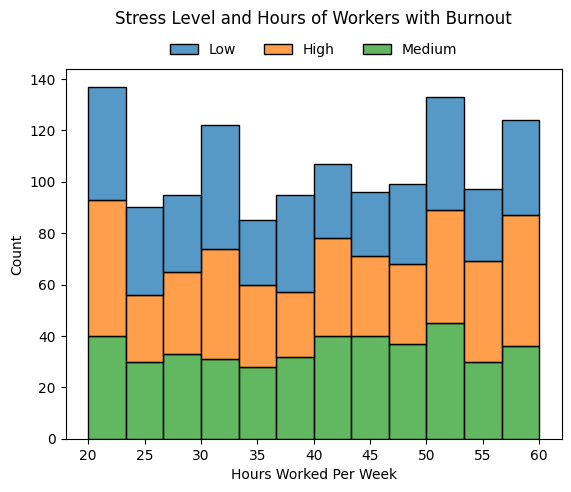

In [99]:
burn_hist = sns.histplot(data=burn_imp, x="Hours_Worked_Per_Week",hue="Stress_Level", multiple="stack")
sns.move_legend(
    burn_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
burn_hist.set_xlabel("Hours Worked Per Week")
burn_hist.set_ylabel("Count")
burn_hist.set_title("Stress Level and Hours of Workers with Burnout", y=1.10)

Text(0.5, 1.1, 'Stress Level Vs. Access to Mental Health Resources')

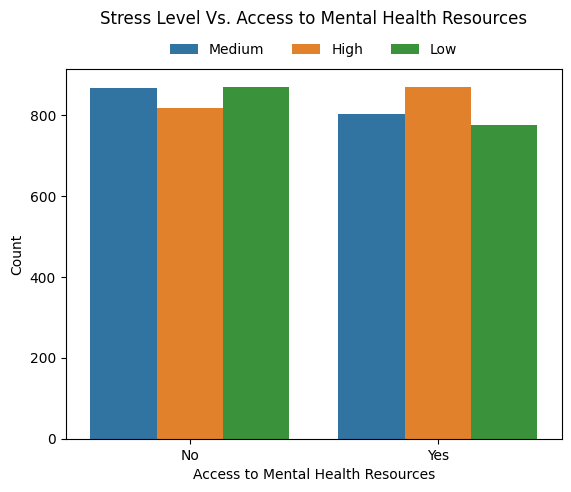

In [100]:
access_ = sns.countplot(data=impact_, x="Access_to_Mental_Health_Resources", hue="Stress_Level")
sns.move_legend(
    access_, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
access_.set_xlabel("Access to Mental Health Resources")
access_.set_ylabel("Count")
access_.set_title("Stress Level Vs. Access to Mental Health Resources", y=1.10)
